In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import root
import math

# R-CURVE
The fracture of quasi-brittle materials can be depicted by an R-curve which is also termed as fracture resistance. R-Curve is an envelope of energy release rate. For quasi-brittle materials, R is an increasing and convex function. This curve may be dependent on specimen geometry and material. 
R-Curves can be constructed using two basic approaches for quasi-brittle materials:

1. Equivalent Elastic Crack Approach
2. Cohesive Crack Approach

A figure shown below highlights that the convex envelope of R-curve serves as the limit for crack gorwth, beyond which the unstable crack grows.

<img src="R-Curve.png" width="300"/>

## Equivalent Elastic Crack Approach
In order to model R-Curve, an effective traction free crack is assumed in this technique.

### R-Curve as an envelope of G-Curve:
At critical crack propagation:
\begin{gather*}
G_c = R_c    \\
\left(\frac{\partial G}{\partial a}\right)_c = \left(\frac{\partial R}{\partial a}\right)_c
\end{gather*}
Here, $a$ represents the crack length. $G_c$ represents the critical strain energy release rate and $R_c$ represents the critical point of R--Curve.
In case of a known geometry, the value of G depends on three independent variable i.e.:
1. specimen width (b)
2. crack length (a)
3. normalized applied load ($\sigma$) (for three point bending $\sigma = 1.5Ps/b^2$)

The total sum of stable crack extension and initial critical crack dimension gives ciritical crack length. R-Curve depends on two factors which are $b$ and $a_0$. The figure below shows the link up of an R-Curve with a G envelope which is the focus of this sheet to re-plot the results for comparison with theory.

<img src="R-Curve explanation.png" width="300"/>

### Energy Release Rate:
The basic equation to calculate Energy Strain rate is obtained from Taylor series and is given as follows where $a_c$ represents critical crack length, $a$ denotes the crack length during elongation and $n$ depends on the function of $G$ in reference to crack length and is 1 if $G$ is a linear function of the crack dimension and 2 if its a quadratic function. 
\begin{gather*}
G = G_c + \sum_{n=1}^{\infty} \frac{1}{n!}\left(\frac{d^nG}{da^n}\right)_c(a - a_c)^n \\
\Delta a_c = a_c - a_o
\end{gather*}
$a_o$ initial crack length

<img src="Three Point Bend Beam.png" width="300"/>

The figure above shows a simple three point bending beam that clearifies the dimensions taken into account in the study to correctly simulate the crack behavior.

In [2]:
G_c, a_0, a_c, a = sp.symbols('G_c, a_0, a_c, a', real=True)
G = sp.Symbol('G')
n = sp.Symbol('n', real = True)
delta_a_c = sp.Function('\Delta{a_c}')(a_c, a_0)
delta_a = sp.Function('\Delta{a}')(a, a_0)
sigma = sp.Symbol (r'\sigma', real = True)
alpha = sp.Symbol(r'\alpha', real = True)
d = sp.Symbol('d', real = True)
P = sp.Symbol('P', real = True)
b = sp.Symbol('b', real = True)
x = sp.Symbol('x', real = True)
K_I = sp.Symbol('K_I', real = True)
E = sp.Symbol('E', real = True)
G_c, a_0, a_c, a

(G_c, a_0, a_c, a)

In [3]:
## Geometry Factor
f_1 = sp.Symbol('f_1', real = True) #1.123 (Three Point bend Beam)
f_2 = sp.Symbol('f_2', real = True) #1.42 (Three Point bend Beam)

K_ic = K_I
#CTOD = COD
CTOD = sp.Symbol('CTOD', real = True)

In [4]:
b = 76.2
P = 100
E = 20000
a_0 = 10
f_1 = 1.123
f_2 = 1.42
x = 10
K_ic = 31.4
CTOD = 0.02

In [5]:
#for three point bending beam as shown in figure
s = 4*b 
sigma = 1.5 * P * s / b**2
sigma 

7.874015748031495

With reference to Linear Elastic Fracture Mechanics the Strain Energy Release Rate for an infinite size specimen can be written as:
\begin{align}
G = \frac{\sigma^2 \pi a {f_1}^2}{E}
\end{align}

$f_1$ is a geometry factor and its value is equal to 1.123 for the three point bend beam and $E$ represents the modulus of Elasticity.

In [6]:
G = sigma**2 * np.pi * a * f_1**2 / E
G

0.0122820807292115*a

When $n = 2$ the expression for R-curve with reference to the theory can be written as:
\begin{gather*}
R = \beta_1(a - a_0)^{d_1} + \beta_2(a - a_0)^{d_2} \\
d_1 = \frac{1}{2} + \frac{\alpha - 1} {\alpha} + \left(\frac{1}{4} + \frac{\alpha - 1} {\alpha} - \left(\frac{\alpha - 1} {\alpha}\right)^2\right)^{\frac{1}{2}} \\
d_2 = \frac{1}{2} + \frac{\alpha - 1} {\alpha} - \left(\frac{1}{4} + \frac{\alpha - 1} {\alpha} - \left(\frac{\alpha - 1} {\alpha}\right)^2\right)^{\frac{1}{2}}
\end{gather*}
Now by using the boundary condition $\frac{d R}{d a}_{a = ac} = 0$, a relation between $\beta_1, \beta_2$ is obtained and the equation for R can be written as: 
\begin{gather*}
R = \beta_2 \psi (a - a_0)^{d_2}
\end{gather*}
where,
\begin{gather*}
\psi =1 - \left(\frac{d_2 - \frac{\alpha - 1}{\alpha}}{d_1 - \frac{\alpha - 1}{\alpha}}\right)\left( \frac{\alpha a_0 - a_0}{\alpha}\right) ^{d_2 - d_1}
\end{gather*}
As $\psi$ is approximately equal to 1. Hence, the R equation will be further simplified.
\begin{gather*}
R = \beta_2 (a - a_0)^{d_2}
\end{gather*}
As the terms $\beta_2$ and $\alpha$ are not known therefore, both the terms can be obtained by the following set of equations.
\begin{gather*}
\beta = \frac {K_{Ic}^2 (\alpha a_0 - a_0)^{-d_2}}{E \left(1 - \frac{d_2 - \frac{\alpha - 1}{\alpha}}{d_1 - \frac{\alpha - 1}{\alpha}} \right)} \\
\alpha = \frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + \sqrt {\frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + 1}
\end{gather*}

where, $f_2$ is a geometry parameter ad is equal to 1.42 for three point bend beam. $\alpha$ is the precritical stable crack growth ($\alpha \geq 1$). It is equal to 1 for a pure brittle material whereas it is greater than 1 for quasi-brittle materials. Moreover, it can be obtained by knowing the critical conditions which are $K_I = K_{Ic}$ and $COD = CTOD_c$. Here, $COD$ stands for crack opening displacement and $CTOD$ represents crack tip opening displacement. Crack tip opening displacement occurs at the tip of the crack that plays a vital role in crack propagation whereas Stress Intenisty factor ($K_I$) is a factor at the end of the process zone. The figure depicted below throws light on the definition of these two parameters.

<img src="COD and KI.png" width="500"/>

In [7]:
term = sp.Function('term')(E, f_1, CTOD, a_0, K_ic, f_2)
term_1 = sp.simplify(term.subs(term, (np.pi * E**2 * f_1**2 * CTOD**2) /(32 * a_0 * K_ic**2 * f_2 **2)))
term_1


0.996422222283000

In [8]:
alpha = (term_1) + sp.sqrt((term_1) + 1)
alpha

2.40937028299967

In [9]:
d_1 = 1/2 + ((alpha - 1) / alpha) + sp.sqrt(1/4 + ((alpha - 1) / alpha) - ((alpha - 1) / alpha)**2)
d_2 = 1/2 + ((alpha - 1) / alpha) - sp.sqrt(1/4 + ((alpha - 1) / alpha) - ((alpha - 1) / alpha)**2)
d_1,d_2

(1.78693872989662, 0.382968853793673)

In [10]:
si = 1 - ((d_2 - (alpha - 1)/alpha)/(d_1 - ((alpha - 1)/alpha)) * ((alpha*a_0 - a_0)/(a - a_0))**(d_2-d_1))
si

0.00409471159704433*(1/(a - 10))**(-1.40396987610295) + 1

In [11]:
beta_2 = (K_ic**2 * (alpha * a_0 - a_0)**(-d_2))/ (E * (1 - ((d_2 - (alpha - 1)/alpha)/(d_1 - ((alpha - 1)/alpha)))))
beta_2

0.0153225027209121

In [12]:
R = beta_2 * (a - a_0)**d_2 # *si
R

0.0153225027209121*(a - 10)**0.382968853793673

In [13]:
get_R = sp.lambdify(a, R, 'numpy')
get_R

<function _lambdifygenerated(a)>

Here, it is to be noted that the value of R cannot exceed the maximum value of $R_{Ic}$ when a > a_c i.e.
\begin{gather*}
R_{Ic} = \frac{K_{Ic}^2}{E}
\end{gather*}

In [14]:
R_ic = (K_ic)**2 / E
R_ic

0.049297999999999995

In [15]:
get_G = sp.lambdify(
    (a), G, 'numpy'
)
G

0.0122820807292115*a

In [16]:
G_general =sigma**2 * np.pi * a * (a/b)**2 / E
G_general
get_general_G = sp.lambdify((a), G_general, 'numpy')
get_general_G
G_general

1.67726812023232e-6*a**3

In [19]:
def get_response(a_min = 11, a_max=30,n_steps=10):
    G_record, R_record, G_general_record = [], [], []
    a_t = np.linspace(a_max,a_min,n_steps+1)
    a = 0
    a_g = np.linspace(a, a_max, n_steps+1)
    for a_n, a in zip(a_t, a_g): 
        G = get_G(a)
        G_general = get_general_G(a)
        R = get_R(a_n)
        #print(R)
        #print(G)
        G_record.append(G)
        R_record.append(R)
        G_general_record.append(G_general)
    return (
        a_t, a_g, np.array(G_record,dtype=np.float_),
        np.array(R_record,dtype=np.float_),
        np.array(G_general_record,dtype=np.float_)
    )

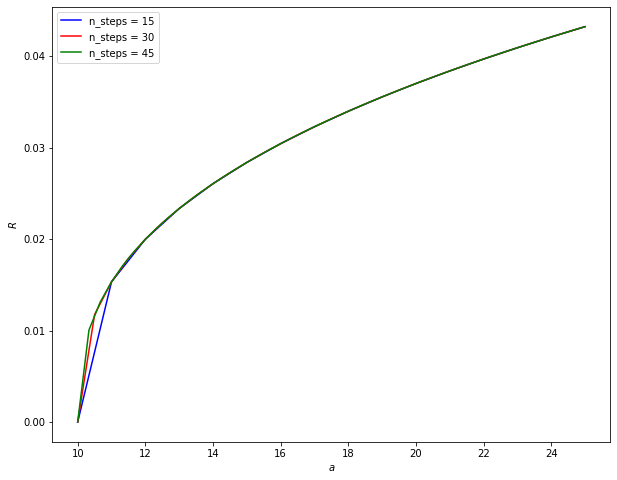

In [27]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(10,8)) #((ax1,ax2),(ax3,ax4))
#ax11 = ax1.twinx()
#ax22 = ax2.twinx()
colors = ['blue','red', 'green', 'black', 'magenta' ]
n_step_range = np.arange(1,4)*15
a_min = 10
a_max = 25
for n_step, color in zip(n_step_range, colors):
    a_t, a_g, G_arr, R_arr, G_general_arr = get_response(a_min, a_max,n_step)
    ax1.plot(a_t, R_arr[:], color=color, 
             label='n_steps = %g' % n_step)
    ax1.set_xlabel('$a$'); ax1.set_ylabel(r'$R$')
    ax1.legend()
    ax11.plot(a_g, G_arr[:], '-.', color=color )
    plt.savefig('R-Curve.pdf')
    #print(a_t)
    #print(a_g)
    #ax2.plot(a_t, R_arr[:], color=color, 
   #          label='n_steps = %g' % n_step)
    #ax2.set_xlabel('$a$'); ax2.set_ylabel(r'$R$')
   # ax2.legend()
    #ax22.plot(a_g, G_general_arr[:], '-.', color=color )